In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Loading train dataset

In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Check train dataset

In [3]:
train.shape

(8693, 14)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
### numeric columns info
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [6]:
### object columns info
train.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


# Work with NaN 

In [7]:
### checking columns for NaN value
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

****Work with object columns****

In [8]:
### fill NaN value with mode
lst = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in lst:
    train[col].fillna(train[col].mode()[0], inplace=True)

In [9]:
### fill NaN forward
train['Cabin'].fillna(method='ffill', inplace=True)

****Works with numeric columns****

In [10]:
train.select_dtypes(exclude='object').isna().sum()

CryoSleep         0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [11]:
### fill age by mean
train['Age'].fillna(train['Age'].mean(), inplace=True)

### fill RoomService, FoodCourt,ShoppingMall, Spa, VRDeck by median
train['RoomService'].fillna(train['RoomService'].median(), inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].median(), inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].median(), inplace=True)
train['Spa'].fillna(train['Spa'].median(), inplace=True)
train['VRDeck'].fillna(train['VRDeck'].median(), inplace=True)

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [14]:
### Transported has a bool type -> change to int
train['Transported'] = train['Transported'].astype(int)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [15]:
train.describe(include='object')

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,8,6097,2


In [16]:
### VIP: 2 values, HomePlanet: 3 values, Destination: 3 values
le = LabelEncoder()

col_encoding = ['HomePlanet', 'Destination', 'VIP']
for col in col_encoding:
    if col in train.columns:
        train[col] = le.fit_transform(train[col])

In [17]:
### add new col -> total amount the passenger has billed  -> sum of [RoomService, FoodCourt, ShoppingMall, Spa, VRDeck]
train['TotalAmount'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train['TotalAmount'].head()

0        0.0
1      736.0
2    10383.0
3     5176.0
4     1091.0
Name: TotalAmount, dtype: float64

In [18]:
### Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
### split Cabin tp 3 label
train['Cabin_deck'] = train['Cabin'].apply(lambda x:x.split('/')[0])
train['Cabin_num'] = train['Cabin'].apply(lambda x:x.split('/')[1]).astype(np.number)
train['Cabin_side'] = train['Cabin'].apply(lambda x:x.split('/')[2])

In [19]:
### add IsAdult according to Age column
train['IsAdult'] = np.where(train['Age'] < 19, 0, 1)

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalAmount,Cabin_deck,Cabin_num,Cabin_side,IsAdult
0,0001_01,1,False,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,B,0.0,P,1
1,0002_01,0,False,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,F,0.0,S,1
2,0003_01,1,False,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,A,0.0,S,1
3,0003_02,1,False,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,A,0.0,S,1
4,0004_01,0,False,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,F,1.0,S,0


# EDA

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_20/218314558.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = train.corr().nlargest(k, 'Transported')['Transported'].index


Text(0.5, 1.0, 'Correlation Heatmap')

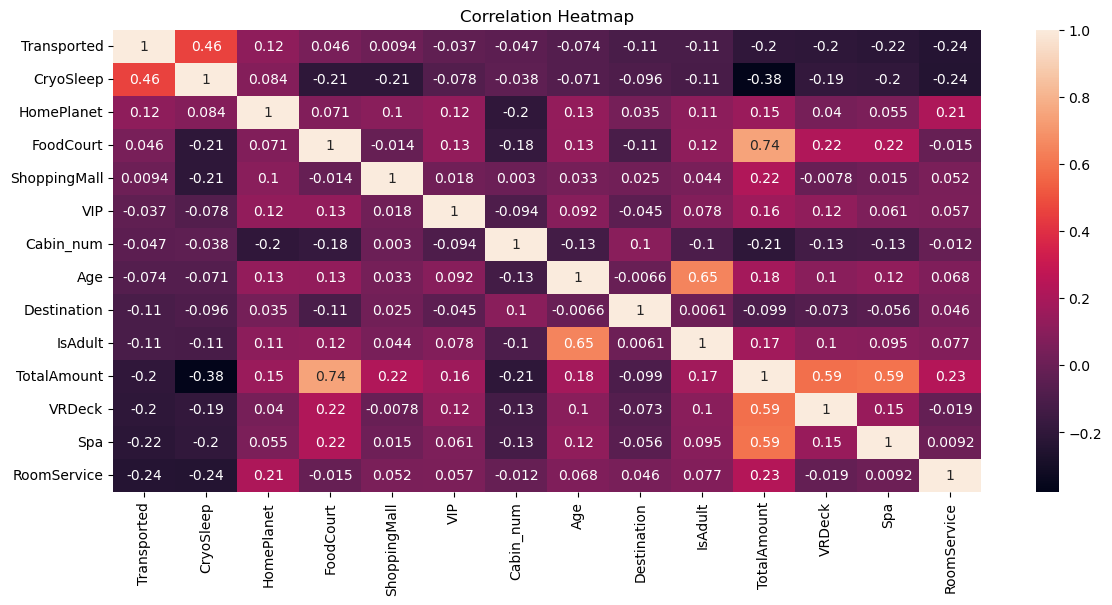

In [22]:
### create heatmap
numeric_columns = train.loc[:,train.dtypes!=object].columns
k = len(numeric_columns)
cols = train.corr().nlargest(k, 'Transported')['Transported'].index
cm = train[cols].corr()

plt.figure(figsize=(14,6))
sns.heatmap(data=cm, annot=True)
plt.title('Correlation Heatmap')

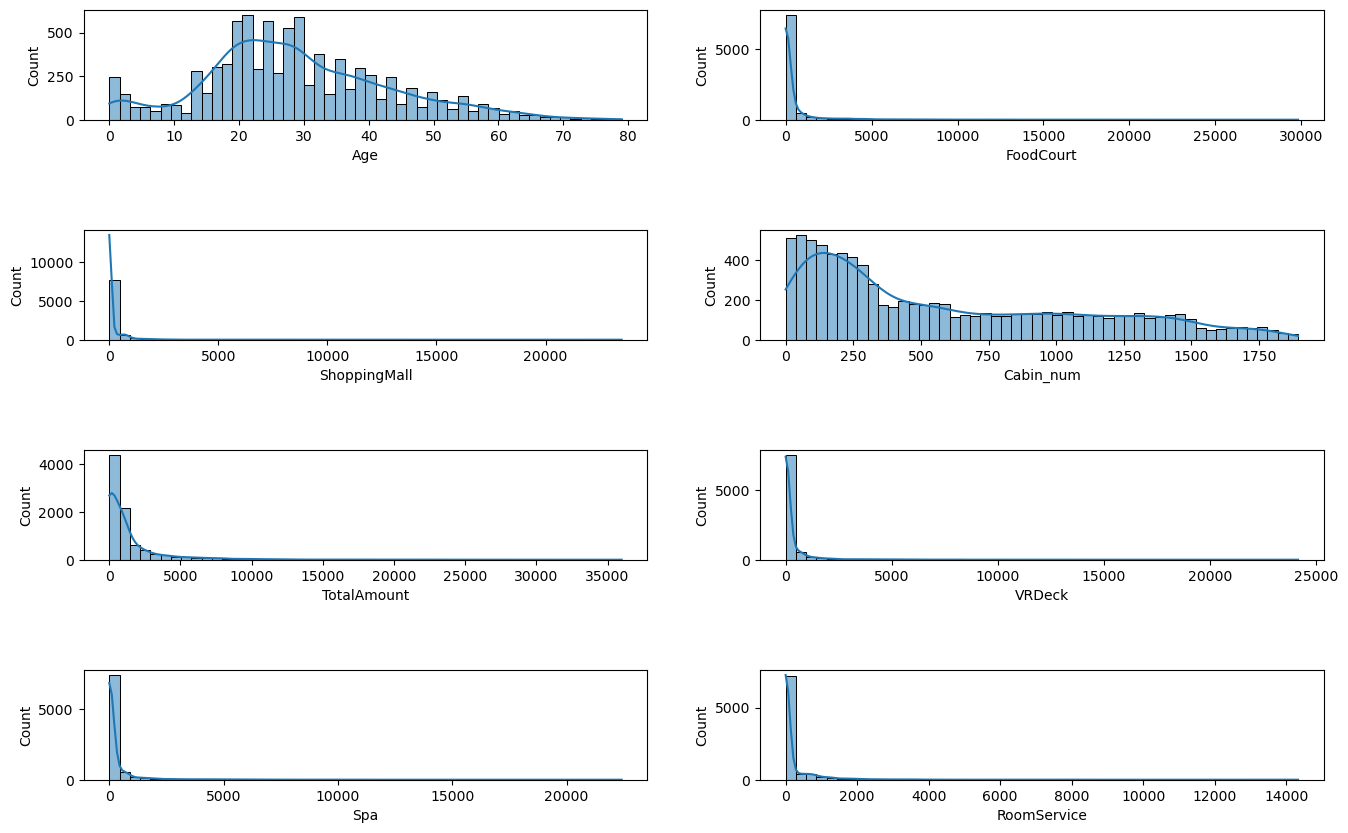

In [23]:
ax_columns = ['Age', 'FoodCourt', 'ShoppingMall', 'Cabin_num', 'TotalAmount', 'VRDeck', 'Spa', 'RoomService']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,10))
plt.subplots_adjust(hspace=1)

for column, ax in zip(ax_columns, axs.ravel()):
    sns.histplot(train[column], kde = True, bins = 50, ax = ax)


<Axes: xlabel='Transported', ylabel='count'>

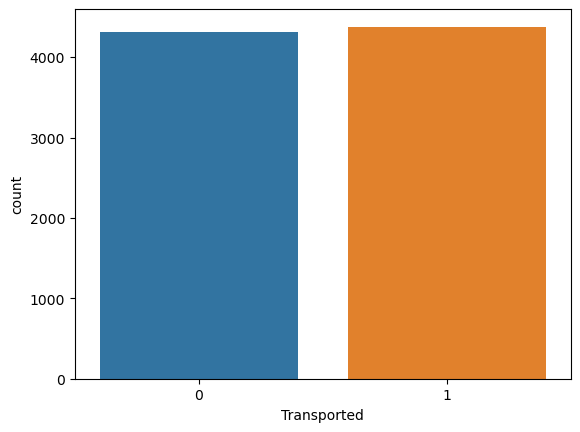

In [24]:
sns.countplot(x = 'Transported', data = train)

# Modelling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
train['CryoSleep'] = train['CryoSleep'].astype(int)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
 14  TotalAmount   8693 non-null   float64
 15  Cabin_deck    8693 non-null   object 
 16  Cabin_num     8693 non-null   float64
 17  Cabin_side    8693 non-null   object 
 18  IsAdult       8693 non-null 

In [28]:
X = train.drop(['PassengerId', 'Name', 'Transported', 'Cabin_deck', 'Cabin_side', 'Cabin'], axis=1)
y = train['Transported']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rfc = RandomForestClassifier(random_state=42)

rfc.fit(x_train, y_train)

y_test_pred = rfc.predict(x_test)


print('Accuracy:', accuracy_score(y_test, y_test_pred))

Accuracy: 0.7734330074755607


# Test data

In [29]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [30]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [31]:
lst = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in lst:
    test[col].fillna(test[col].mode()[0], inplace=True)

In [32]:
test['Cabin'].fillna(method='ffill', inplace=True)

In [33]:
### fill age by mean
test['Age'].fillna(test['Age'].mean(), inplace=True)

### fill RoomService, FoodCourt,ShoppingMall, Spa, VRDeck by median
test['RoomService'].fillna(test['RoomService'].median(), inplace=True)
test['FoodCourt'].fillna(test['FoodCourt'].median(), inplace=True)
test['ShoppingMall'].fillna(test['ShoppingMall'].median(), inplace=True)
test['Spa'].fillna(test['Spa'].median(), inplace=True)
test['VRDeck'].fillna(test['VRDeck'].median(), inplace=True)

In [34]:
col_encoding = ['HomePlanet', 'Destination', 'VIP']
for col in col_encoding:
    if col in test.columns:
        test[col] = le.fit_transform(test[col])



In [35]:
### add new col -> total amount the passenger has billed  -> sum of [RoomService, FoodCourt, ShoppingMall, Spa, VRDeck]
test['TotalAmount'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
test['TotalAmount'].head()

0       0.0
1    2832.0
2       0.0
3    7418.0
4     645.0
Name: TotalAmount, dtype: float64

In [36]:
test['Cabin_deck'] = test['Cabin'].apply(lambda x:x.split('/')[0])
test['Cabin_num'] = test['Cabin'].apply(lambda x:x.split('/')[1]).astype(np.number)
test['Cabin_side'] = test['Cabin'].apply(lambda x:x.split('/')[2])

In [37]:
test['IsAdult'] = np.where(test['Age'] < 19, 0, 1)

In [38]:
test['CryoSleep'] = test['CryoSleep'].astype(int)

In [39]:
passengerId = test['PassengerId']

In [40]:
X2 = test.drop(['PassengerId', 'Name', 'Cabin_deck', 'Cabin_side', 'Cabin'], axis=1)

y_pred_rfc = rfc.predict(X2)

## CatBoostClassifier model

In [41]:
from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV

new_cbc = CatBoostClassifier(learning_rate=0.03, l2_leaf_reg=3, depth=6, metric_period=100)
new_cbc.fit(x_train, y_train)
y_pred = new_cbc.predict(X2)
y_pred = y_pred.astype(bool)

0:	learn: 0.6776973	total: 57.9ms	remaining: 57.9s
100:	learn: 0.4263001	total: 418ms	remaining: 3.72s
200:	learn: 0.3988529	total: 788ms	remaining: 3.13s
300:	learn: 0.3822409	total: 1.15s	remaining: 2.67s
400:	learn: 0.3664641	total: 1.52s	remaining: 2.27s
500:	learn: 0.3520645	total: 1.89s	remaining: 1.88s
600:	learn: 0.3385202	total: 2.25s	remaining: 1.49s
700:	learn: 0.3264210	total: 2.62s	remaining: 1.11s
800:	learn: 0.3151633	total: 2.98s	remaining: 740ms
900:	learn: 0.3049783	total: 3.35s	remaining: 368ms
999:	learn: 0.2958720	total: 3.71s	remaining: 0us


In [42]:
sub_file = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': y_pred})
sub_file.to_csv('submission.csv', index=False)